In [1]:
import utils
import re
import numpy as np
from collections import namedtuple

import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display, clear_output
from time import sleep

# Day 10 The Stars Align

We are tracking positions of points of lights in the sky by recording:

- position (pair of nums)
- velocity (pair of nums)

First up, I'm going to use a namedtuple to record each entry:

In [2]:
Light = namedtuple("Light", ["x", "y", "xv", "yv"])

In [13]:
test_inp = """
position=< 9,  1> velocity=< 0,  2>
position=< 7,  0> velocity=<-1,  0>
position=< 3, -2> velocity=<-1,  1>
position=< 6, 10> velocity=<-2, -1>
position=< 2, -4> velocity=< 2,  2>
position=<-6, 10> velocity=< 2, -2>
position=< 1,  8> velocity=< 1, -1>
position=< 1,  7> velocity=< 1,  0>
position=<-3, 11> velocity=< 1, -2>
position=< 7,  6> velocity=<-1, -1>
position=<-2,  3> velocity=< 1,  0>
position=<-4,  3> velocity=< 2,  0>
position=<10, -3> velocity=<-1,  1>
position=< 5, 11> velocity=< 1, -2>
position=< 4,  7> velocity=< 0, -1>
position=< 8, -2> velocity=< 0,  1>
position=<15,  0> velocity=<-2,  0>
position=< 1,  6> velocity=< 1,  0>
position=< 8,  9> velocity=< 0, -1>
position=< 3,  3> velocity=<-1,  1>
position=< 0,  5> velocity=< 0, -1>
position=<-2,  2> velocity=< 2,  0>
position=< 5, -2> velocity=< 1,  2>
position=< 1,  4> velocity=< 2,  1>
position=<-2,  7> velocity=< 2, -2>
position=< 3,  6> velocity=<-1, -1>
position=< 5,  0> velocity=< 1,  0>
position=<-6,  0> velocity=< 2,  0>
position=< 5,  9> velocity=< 1, -2>
position=<14,  7> velocity=<-2,  0>
position=<-3,  6> velocity=< 2, -1>"""

def parse_input(inp=test_inp):
    inp = inp.strip().splitlines()
    data = []
    for entry in inp:
        nums = [int(i) for i in re.findall("-?[\d]+", entry)]
        data.append(Light(*nums))
        
    return data

test_lights = parse_input()
test_lights[:3]

[Light(x=9, y=1, xv=0, yv=2),
 Light(x=7, y=0, xv=-1, yv=0),
 Light(x=3, y=-2, xv=-1, yv=1)]

so now to update the position of the lights:

In [6]:
def move_light(light, t=1):
    """moves a light for time t and returns a new light"""
    return Light(light.x + light.xv*t, light.y + light.yv*t, light.xv, light.yv)

print(test_lights[0])
move_light(test_lights[0])

Light(x=9, y=1, xv=0, yv=2)


Light(x=9, y=3, xv=0, yv=2)

Now to show the lights:

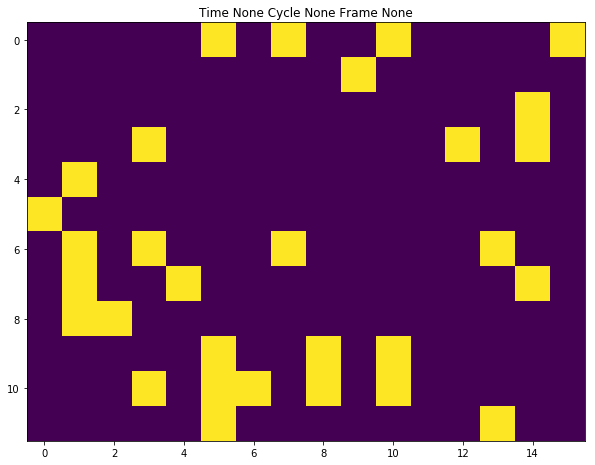

In [7]:
def show_lights_imshow(lights=test_lights, time=None, cycle=None, frame=None):
    clear_output(wait=True)
    xx, yy, _, _ = zip(*lights)
    
    grid = np.zeros(shape=(max(yy)+1, max(xx)+1), dtype="int")
    for x, y in zip(xx, yy):
        grid[y,x] = 1
    
    fig, ax = plt.subplots(figsize=(10,10))
    ax.set_title(f"Time {time} Cycle {cycle} Frame {frame}")
    ax.imshow(grid)
    plt.show()

show_lights_imshow()

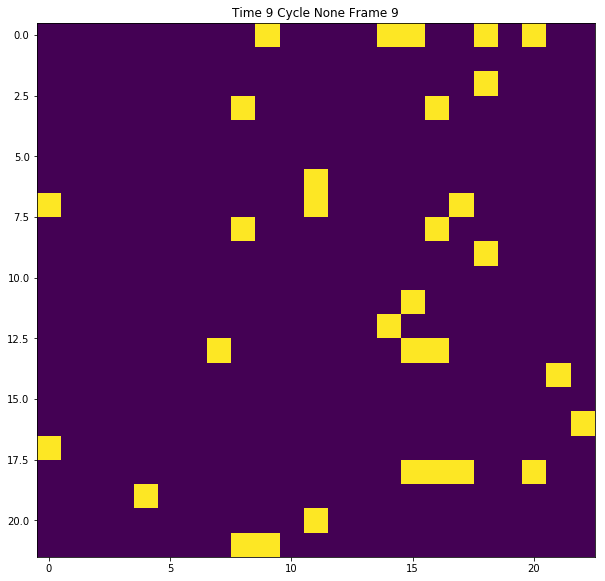

In [11]:
lights = parse_input(test_inp)
for frame in range(10):
    lights = [move_light(l) for l in lights]
    show_lights_imshow(lights, frame=frame, time=frame)

Now to solve the above. First I eyeballed the changing lights, and looks like the msg appears when the y coordinates of the lights are closest together, so here I show the lights when below a given y difference threshold:

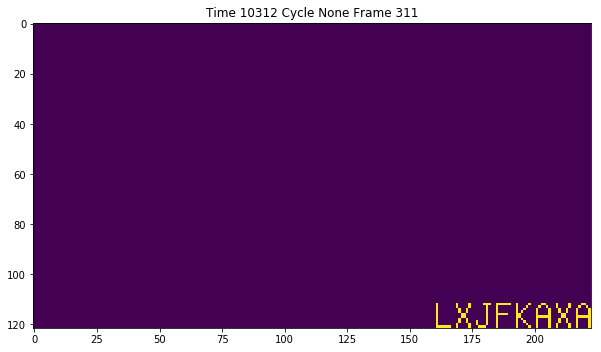

In [19]:
inp = utils.get_input(10)

def solve(inp, frames, time=10000, show_y=70):
    lights = parse_input(inp)
    
    # doing a big initial move
    lights = [move_light(l, time) for l in lights]
    
    y_min = 10000000
    
    for frame in range(frames):
        time += 1
        lights = [move_light(l) for l in lights]
        
        y = [l.x for l in lights]
        y_diff = max(y) - min(y)
        
        if max(y) - min(y) < show_y:
            show_lights_imshow(lights, time=time, frame=frame)
            sleep(0.01)
            
solve(inp, frames=1000)

So thats solved both parts 1 and 2. 

Todo:

- animate this!